# Load Libraries and Data

- Import Tensorflow
- Import Sklearn Iris Dataset
- Import ```train_test_split``` function from sklearn

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

2023-03-23 17:05:43.906498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 17:05:46.758847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 17:05:46.759036: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras

# Create a simple Sequential Model

- It's a sequential model
- There are 2 layers
- first is the input layer with 10 nuerons and the input shape is (4,) representing the 4 inputs (red green blue and alpha channel of pixels. activation function is ```relu```.
- second layer is the output layer with only 1 neuron and the activation function is ```sigmoid```

In [2]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-03-23 17:05:54.990947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:41:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 17:05:55.421570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:41:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 17:05:55.422087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:41:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 17:05:55.424050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

# Compile

- Next, let's compile our model and specify the loss function, optimizer, and evaluation metric

In [3]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Training

- train our model for 50 epochs
- use a validation split of 0.2
- a history object, which contains information about the training process, such as the loss and accuracy at each epoch.

In [4]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


2023-03-23 17:06:09.554727: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f60f8d15540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-23 17:06:09.554802: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2023-03-23 17:06:09.595194: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-23 17:06:10.350001: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 [==============================] - 3s 110ms/step - loss: -0.5237 - accuracy: 0.3542 - val_loss: -2.1920 - val_accuracy: 0.2917
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: -0.5533 - accuracy: 0.3542 - val_loss: -2.2454 - val_accuracy: 0.2917
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: -0.5825 - accuracy: 0.3542 - val_loss: -2.3030 - val_accuracy: 0.2917
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: -0.6167 - accuracy: 0.3542 - val_loss: -2.3535 - val_accuracy: 0.2917
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: -0.6434 - accuracy: 0.3542 - val_loss: -2.4107 - val_accuracy: 0.2917
Epoch 6/50
3/3 [==============================] - 0s 42ms/step - loss: -0.6765 - accuracy: 0.3542 - val_loss: -2.4654 - val_accuracy: 0.2917
Epoch 7/50
3/3 [==============================] - 0s 45ms/step - loss: -0.7037 - accuracy: 0.3542 - val_loss: -2.5234 - val_accuracy: 0.2917
Epoch 8/50
3/3 [=======

# Model Evaluation
- print the test accuracy of our model

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 37ms/step - loss: -3.0340 - accuracy: 0.3000
Test accuracy: 0.30000001192092896


1/1 [==============================] - 0s 98ms/step


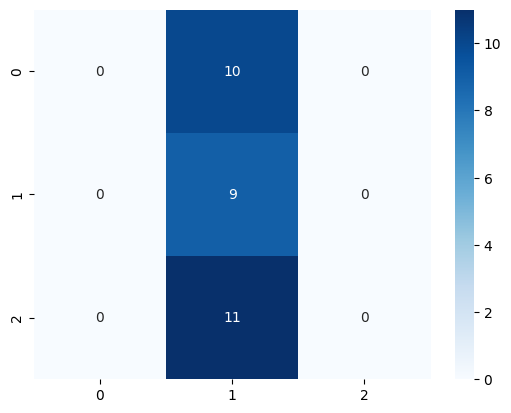

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = [1 if pred > 0.5 else 0 for pred in y_pred]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)